In [286]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import norm
import matplotlib.patches as mpatches

drive_path = 'Database/'
contents = os.listdir(drive_path)

for dirname, _, filenames in os.walk(drive_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

df=pd.read_csv(drive_path + 'CVD_cleaned.csv')
df.head()

# from google.colab import drive
# drive.mount('/content/drive')

# drive_path = '/content/drive/MyDrive/Colab Notebooks/Data Science'
# contents = os.listdir(drive_path)

# for dirname, _, filenames in os.walk(drive_path):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# df=pd.read_csv(drive_path + '/CVD_cleaned.csv')
# df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/Data Science/CVD_cleaned.csv


,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


## Tentativa inicial de encontrar correlação entre colunas

<ipython-input-287-e7be8e2bedce>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


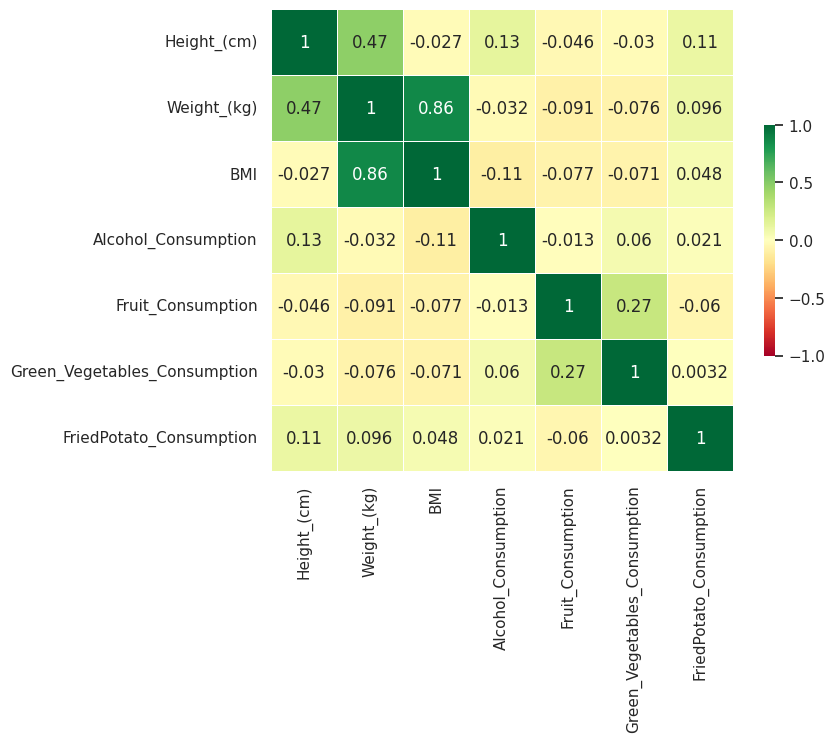

In [287]:
sns.set(style="darkgrid")

f, ax = plt.subplots(figsize=(8, 6))
# Criando a matriz de correlação
corr = df.corr()

sns.heatmap(corr, annot=True, cmap='RdYlGn', vmax=1,
        vmin=-1, center=0, square=True,
        linewidth=.5, cbar_kws={"shrink":.5})

plt.show()

## Conferindo tipos e consistência dos dados

In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [289]:
num = df.select_dtypes(include=['float64']).columns.sort_values()
cat = df.select_dtypes(include=['object']).columns.sort_values()

print("Variáveis numéricas:", len(num))
print("Variáveis categóricas:", len(cat))

Variáveis numéricas: 7
Variáveis categóricas: 12


In [290]:
for enum in cat:
  print(enum)
  print(df[enum].unique())
  print("\n")

Age_Category
['70-74' '60-64' '75-79' '80+' '65-69' '50-54' '45-49' '18-24' '30-34'
 '55-59' '35-39' '40-44' '25-29']


Arthritis
['Yes' 'No']


Checkup
['Within the past 2 years' 'Within the past year' '5 or more years ago'
 'Within the past 5 years' 'Never']


Depression
['No' 'Yes']


Diabetes
['No' 'Yes' 'No, pre-diabetes or borderline diabetes'
 'Yes, but female told only during pregnancy']


Exercise
['No' 'Yes']


General_Health
['Poor' 'Very Good' 'Good' 'Fair' 'Excellent']


Heart_Disease
['No' 'Yes']


Other_Cancer
['No' 'Yes']


Sex
['Female' 'Male']


Skin_Cancer
['No' 'Yes']


Smoking_History
['Yes' 'No']




In [291]:
for enum in num:
  print(enum)
  print("Min:" + str(df[enum].min()) + "\tMax:" + str(df[enum].max()))
  print("\n")

Alcohol_Consumption
Min:0.0	Max:30.0


BMI
Min:12.02	Max:99.33


FriedPotato_Consumption
Min:0.0	Max:128.0


Fruit_Consumption
Min:0.0	Max:120.0


Green_Vegetables_Consumption
Min:0.0	Max:128.0


Height_(cm)
Min:91.0	Max:241.0


Weight_(kg)
Min:24.95	Max:293.02




In [292]:
# Conferindo se tem valores nulos no dataset
df.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

## Convertendo colunas categóricas para numéricas

In [293]:
# Vamos começar com os casos especiais

# Convertendo a categoria de diabete separadamente porque possui 4 strings, mas pode ser simplificado para booleano
def simplify_diabetes(diabetes_status):
    if "No" in diabetes_status:
        return 0
    elif "Yes" in diabetes_status:
        return 1

processed_df = df.copy()
processed_df['Diabetes'] = processed_df['Diabetes'].apply(simplify_diabetes)

# Checkup e Age_Category podem ser tratados por meio de Label Encoding
checkup_values = {
    'Never': 0,
    'Within the past year': 4,
    'Within the past 2 years': 3,
    'Within the past 5 years': 2,
    '5 or more years ago': 1
}

processed_df['Checkup'] = processed_df['Checkup'].map(checkup_values)

age_category_values = {
    '18-24': 1,
    '25-29': 2,
    '30-34': 3,
    '35-39': 4,
    '40-44': 5,
    '45-49': 6,
    '50-54': 7,
    '55-59': 8,
    '60-64': 9,
    '65-69': 10,
    '70-74': 11,
    '75-79': 12,
    '80+': 13
}

processed_df['Age_Category'] = processed_df['Age_Category'].map(age_category_values)

In [294]:
def binary_encoding(df, category, str1, str2):
  df[category].replace([str1, str2], [0, 1], inplace=True)
  return df

processed_df = binary_encoding(processed_df, "Heart_Disease", "No", "Yes")
processed_df = binary_encoding(processed_df, "Smoking_History", "No", "Yes")
processed_df = binary_encoding(processed_df, "Arthritis", "No", "Yes")
processed_df = binary_encoding(processed_df, "Depression", "No", "Yes")
processed_df = binary_encoding(processed_df, "Exercise", "No", "Yes")
processed_df = binary_encoding(processed_df, "Skin_Cancer", "No", "Yes")
processed_df = binary_encoding(processed_df, "Other_Cancer", "No", "Yes")
processed_df = binary_encoding(processed_df, "Smoking_History", "No", "Yes")

In [295]:
def one_hot_encoding(df, category):
  dummies = pd.get_dummies(df[category], prefix=category)
  df = pd.concat([df, dummies], axis='columns')
  df = df.drop([category], axis=1)
  return df

processed_df = one_hot_encoding(processed_df, "General_Health")
processed_df = one_hot_encoding(processed_df, "Sex")
processed_df.head()

,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Age_Category,Height_(cm),...,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,General_Health_Excellent,General_Health_Fair,General_Health_Good,General_Health_Poor,General_Health_Very Good,Sex_Female,Sex_Male
0,3,0,0,0,0,0,0,1,11,150.0,...,30.0,16.0,12.0,0,0,0,1,0,1,0
1,4,0,1,0,0,0,1,0,11,165.0,...,30.0,0.0,4.0,0,0,0,0,1,1,0
2,4,1,0,0,0,0,1,0,9,163.0,...,12.0,3.0,16.0,0,0,0,0,1,1,0
3,4,1,1,0,0,0,1,0,12,180.0,...,30.0,30.0,8.0,0,0,0,1,0,0,1
4,4,0,0,0,0,0,0,0,13,191.0,...,8.0,4.0,0.0,0,0,1,0,0,0,1


## Visualização dos dados

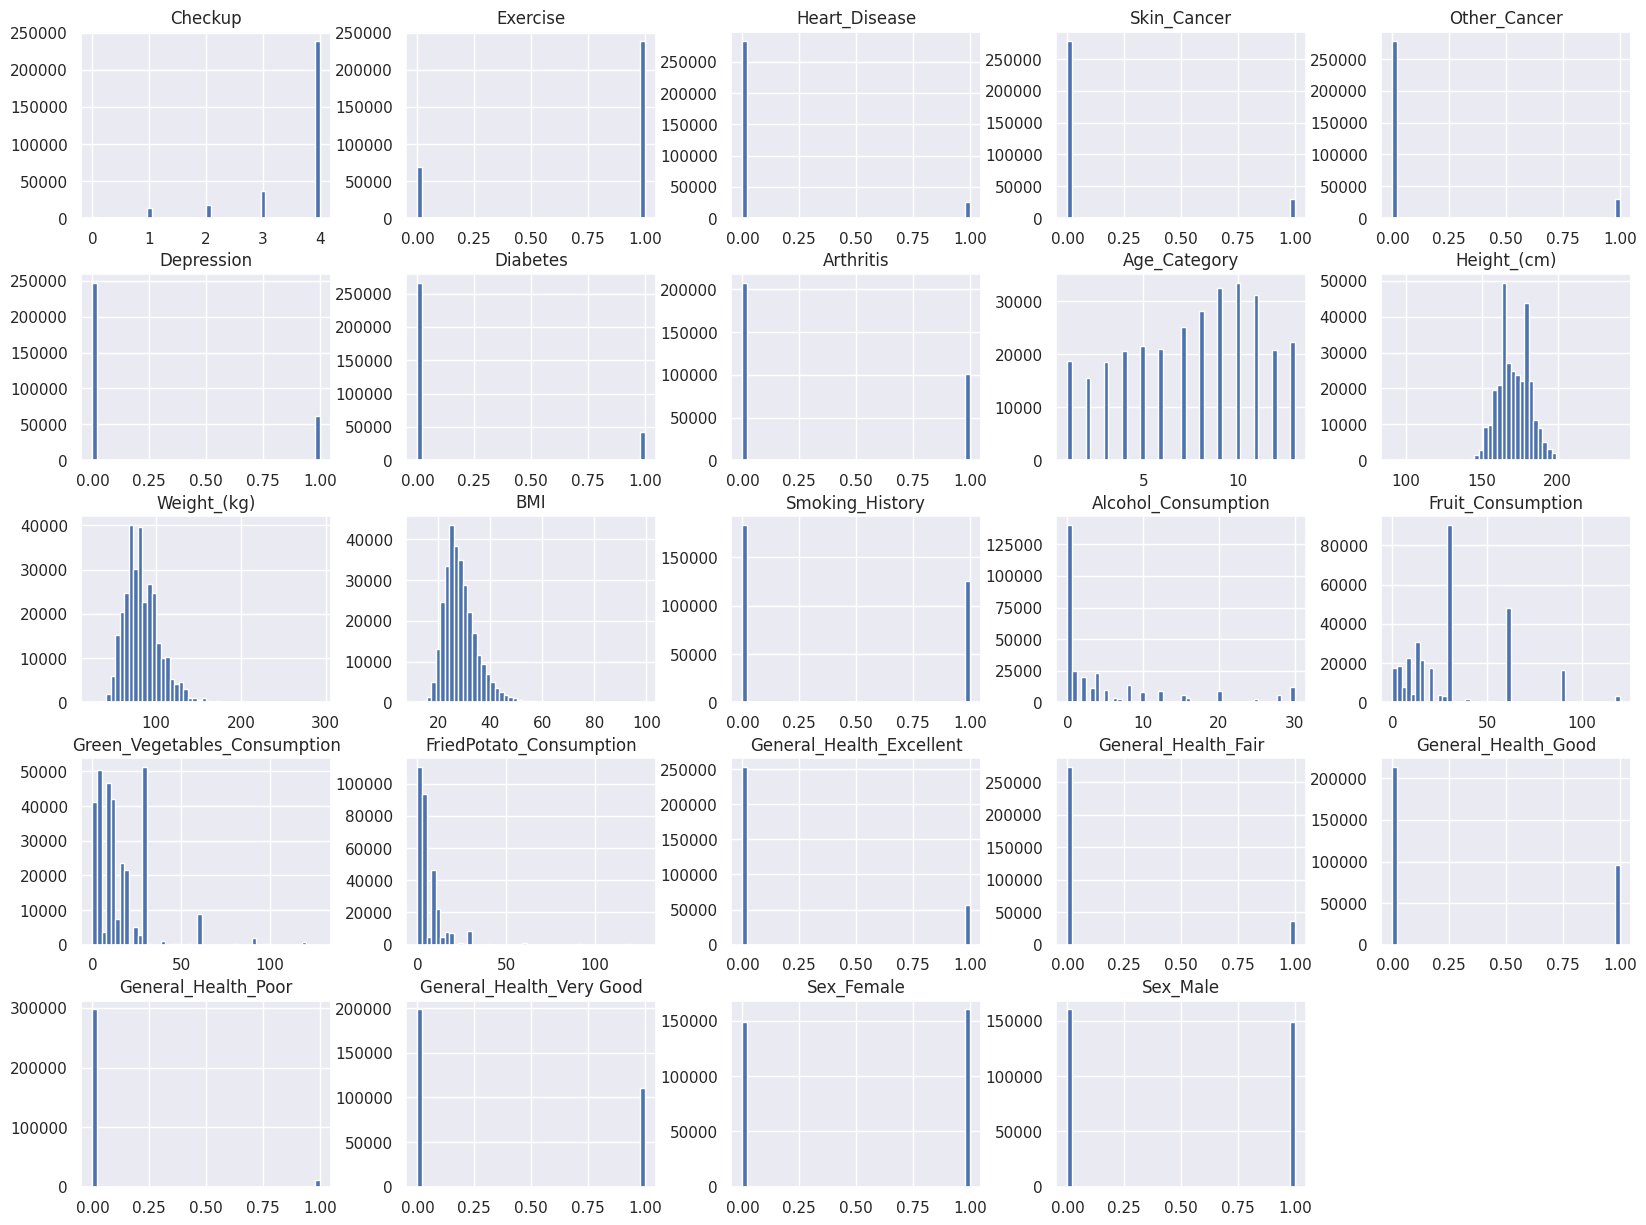

In [296]:
processed_df.hist(bins=50, figsize=(20,15))
plt.show()

<Axes: >

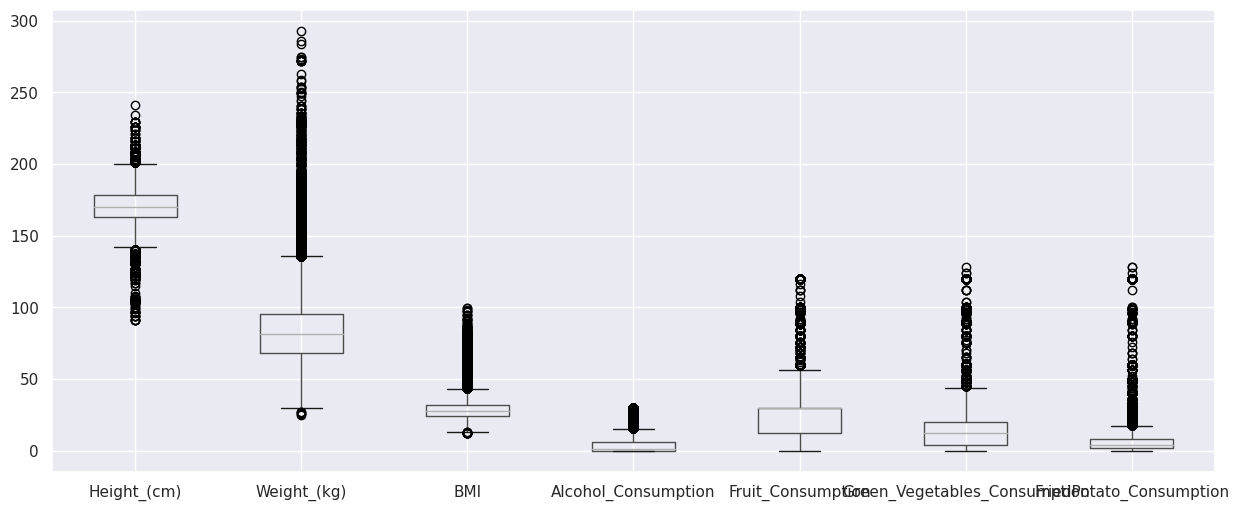

In [297]:
plt.figure(figsize=(15, 6))
df.boxplot()

## Normalizando dados

In [298]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(processed_df)
scaled_df = pd.DataFrame(scaled_df, columns=processed_df.columns)

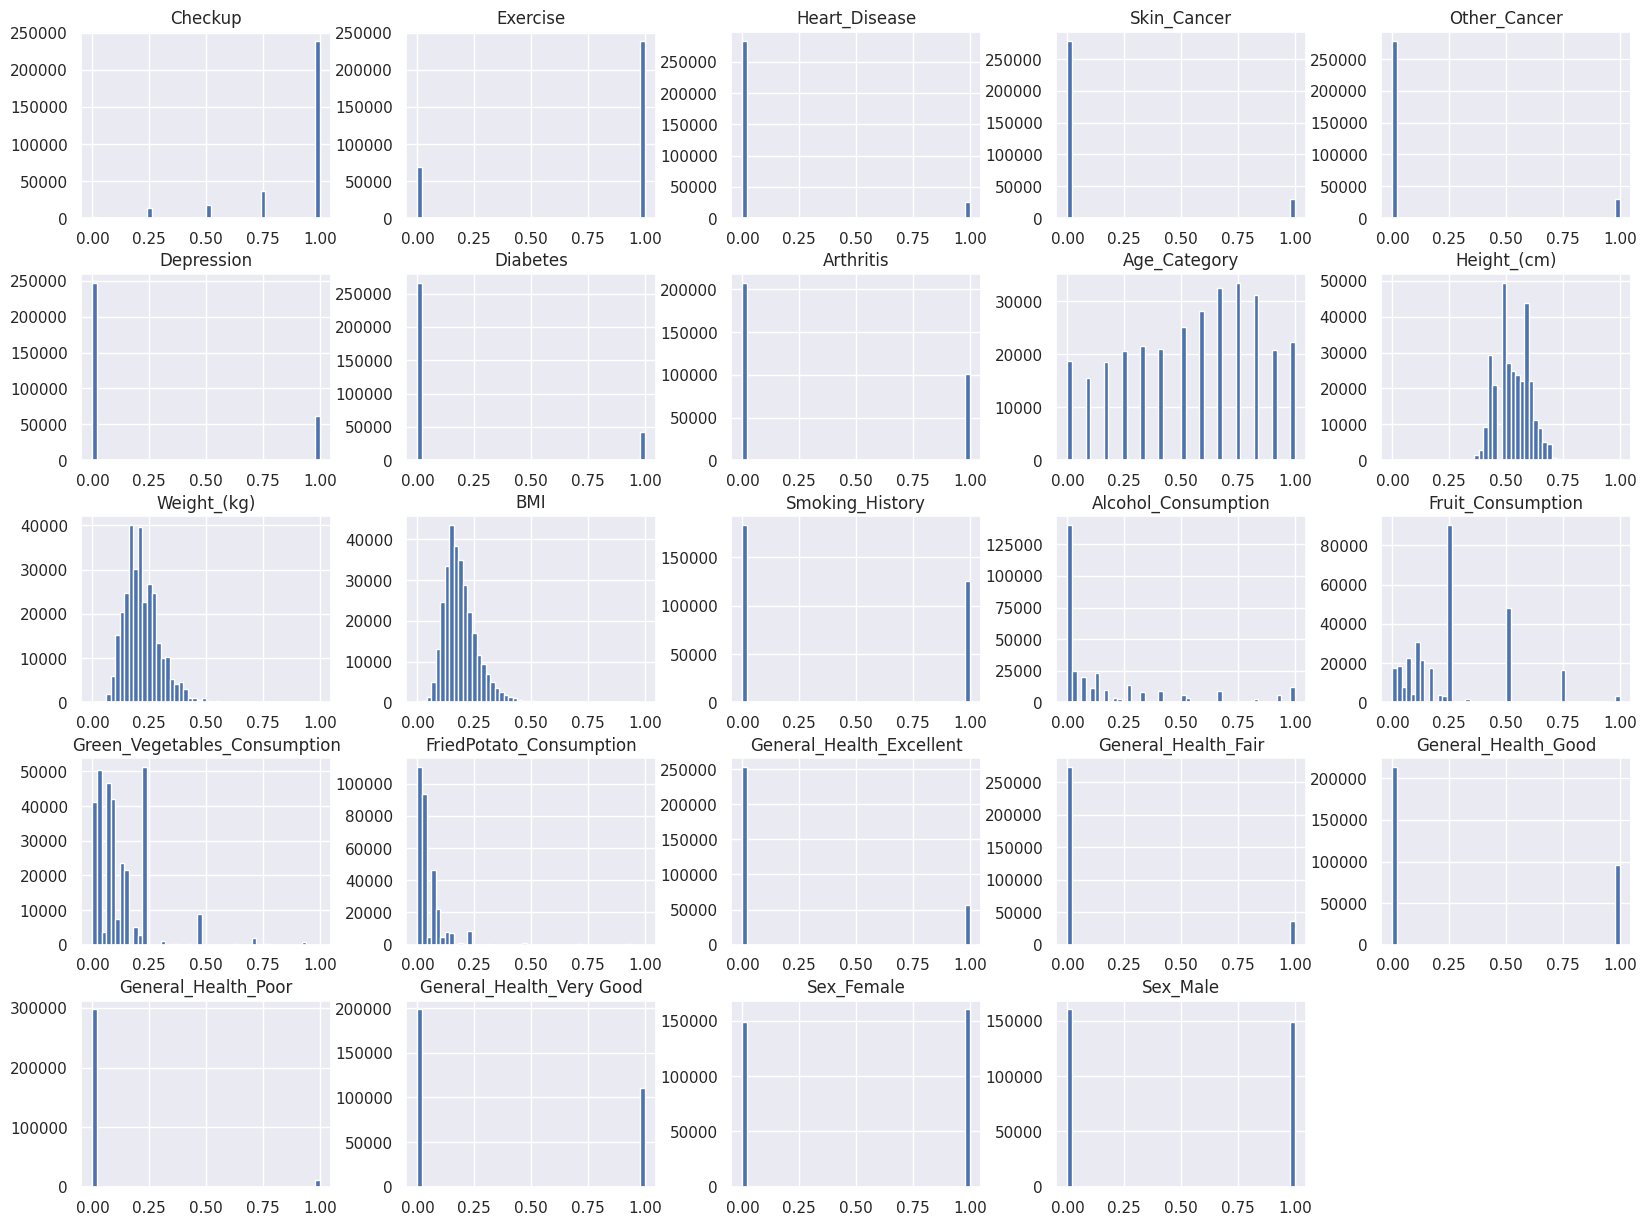

In [299]:
scaled_df.hist(bins=50, figsize=(20,15))
plt.show()

<Axes: >

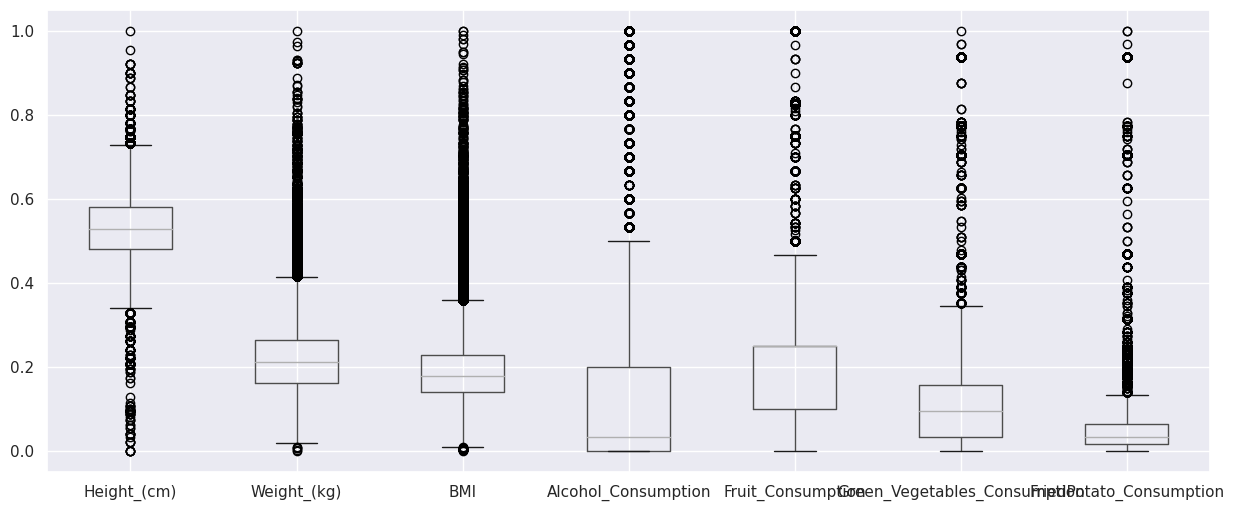

In [300]:
plt.figure(figsize=(15, 6))
scaled_df.boxplot(column=["Height_(cm)", "Weight_(kg)", "BMI", "Alcohol_Consumption", "Fruit_Consumption", "Green_Vegetables_Consumption", "FriedPotato_Consumption"])

## Nova matriz de correlação

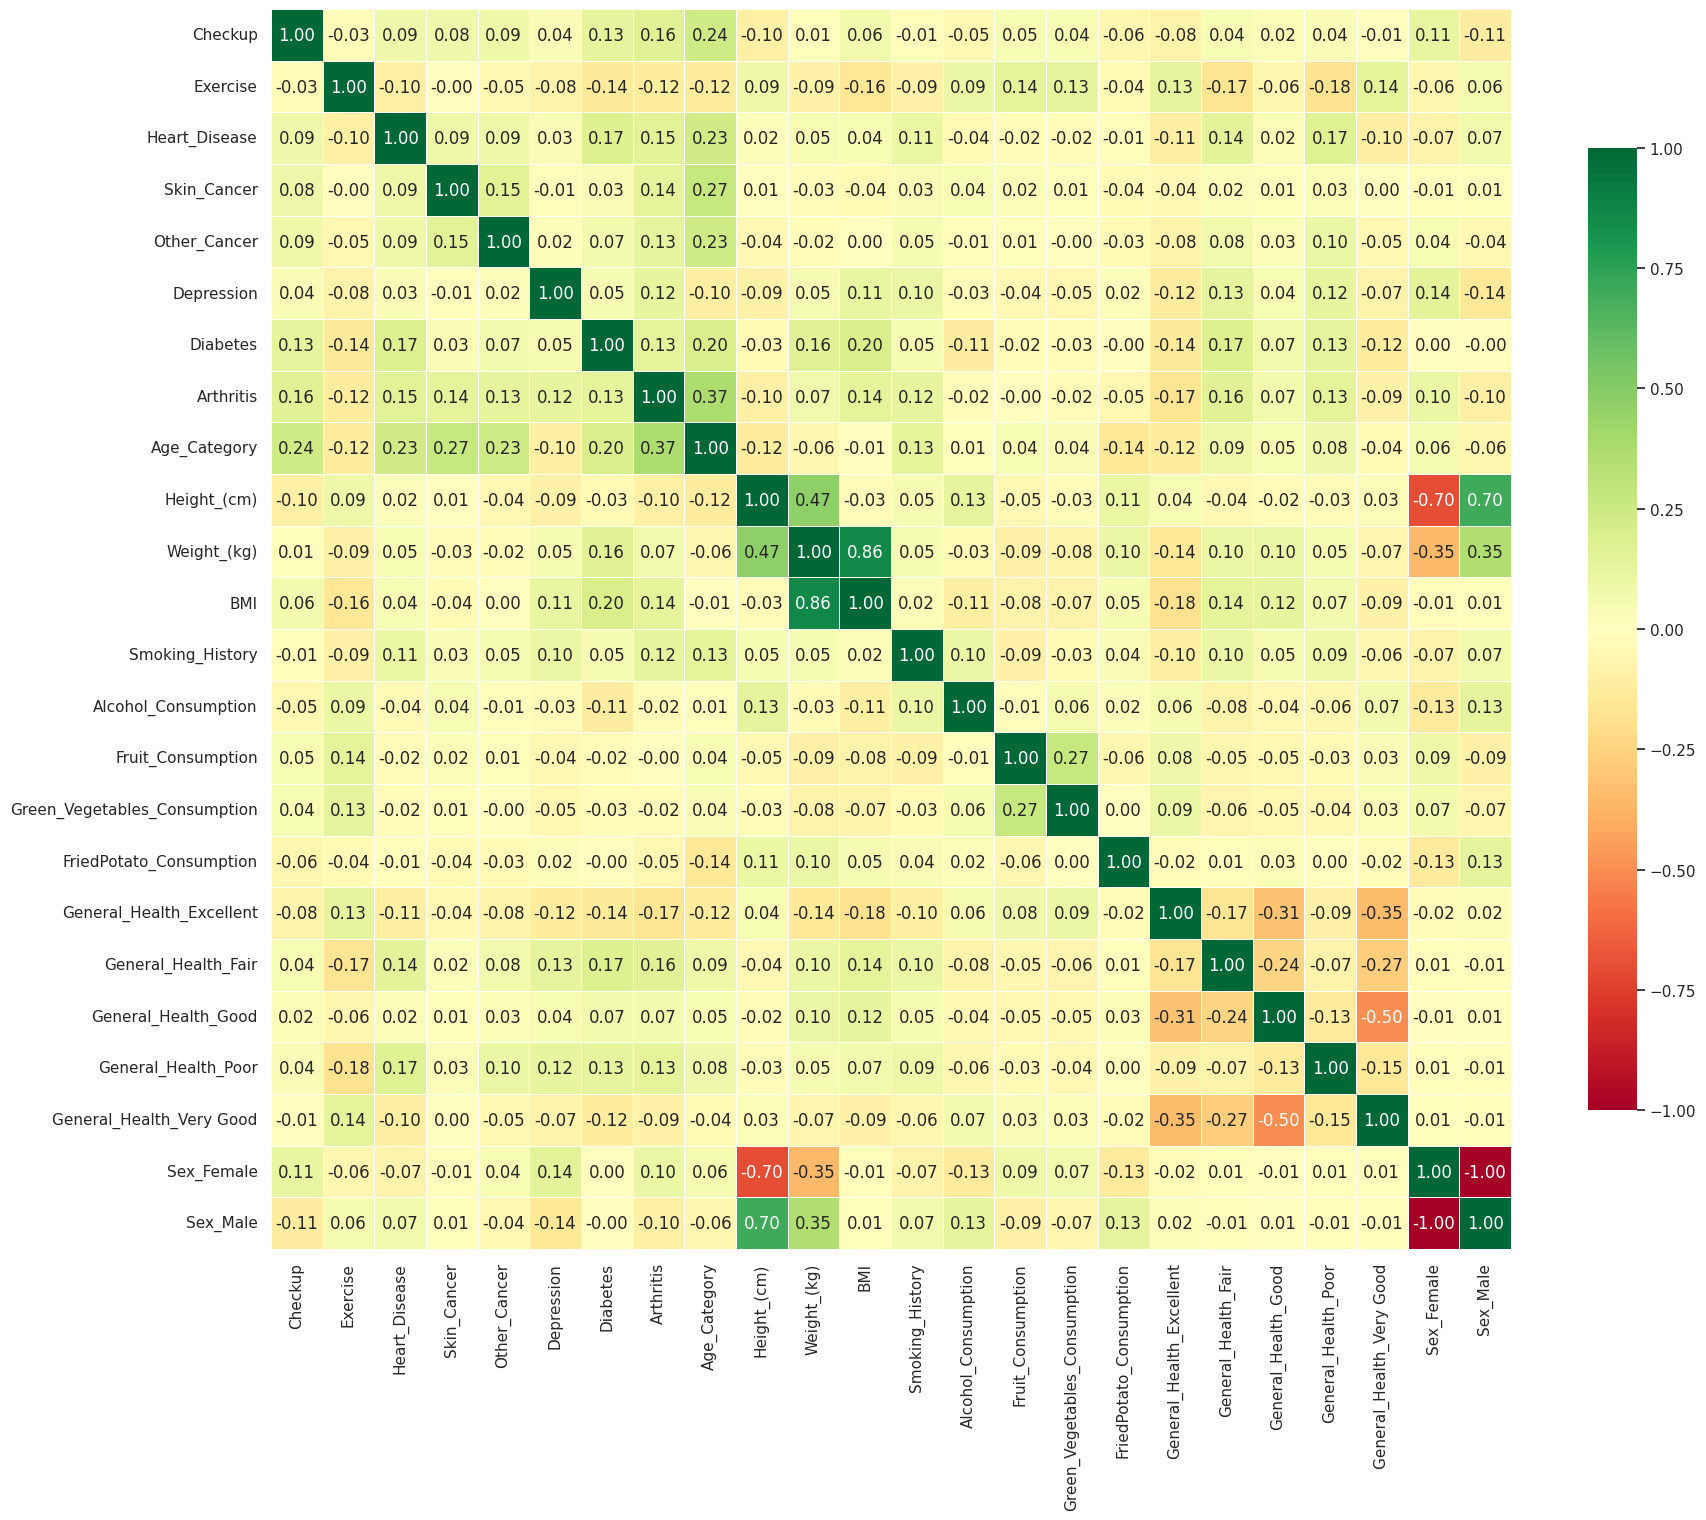

In [301]:
sns.set(style="darkgrid")

f, ax = plt.subplots(figsize=(20, 25))
corr = scaled_df.corr()

sns.heatmap(corr, annot=True, cmap='RdYlGn', vmax=1,
        vmin=-1, center=0, square=True,
        linewidth=.5, cbar_kws={"shrink":.5}, fmt=".2f")

plt.show()

# Correlação mais forte com doenças coronárias é a idade, mas ainda é fraca

## Visualização com grafos

In [302]:
# from scipy.spatial import distance

# def compute_similarity(patient1, patient2):
#     features1 = patient1.values
#     features2 = patient2.values
#     similarity_score = 1 / (1 + distance.euclidean(features1, features2))
#     return similarity_score


In [303]:
# import networkx as nx

# G = nx.Graph()
# for patient_id in range(len(processed_df)):
#     G.add_node(patient_id)

# for patient1_id in range(len(processed_df)):
#     for patient2_id in range(patient1_id + 1, len(processed_df)):
#         similarity_score = compute_similarity(processed_df.iloc[patient1_id], processed_df.iloc[patient2_id])
#         if similarity_score >= 0.5:
#             G.add_edge(patient1_id, patient2_id, weight=similarity_score)

# import matplotlib.pyplot as plt

# pos = nx.spring_layout(G)
# nx.draw(G, pos, with_labels=False, node_size=10)
# plt.show()


## Há diferenças significativas entre homens e mulheres em relação a doenças cardiovasculares?

In [304]:
#Recolhendo numero de homens e mulheres totais
totalH = len(df.query('Sex == "Male"'))
totalM = len(df.query('Sex == "Female"'))
print("Total de homens: \t", totalH)
print("Total de mulheres: \t", totalM)

Total de homens: 	 148658
Total de mulheres: 	 160196


In [305]:
#Recolher a porcentagem de homens e mulheres que possuem doenças cardiovasculares
homemCVD = df.query('Sex == "Male" and Heart_Disease == "Yes"')
mulherCVD = df.query('Sex == "Female" and Heart_Disease == "Yes"')
print("Homens com CVD: \t",len(homemCVD),"=>",format(len(homemCVD)/totalH*100,'.2f'),"%")
print("Mulheres com CVD: \t",len(mulherCVD),"=>",format(len(mulherCVD)/totalM*100,'.2f'),"%")

Homens com CVD: 	 15073 => 10.14 %
Mulheres com CVD: 	 9898 => 6.18 %


#### Utilizando odds ratio:

In [306]:
OR = (len(homemCVD)/totalH)/(len(mulherCVD)/totalM)
print("Odds Ratio: \t\t",format(OR,'.2f'))
print("Homens tem 64% chances de ter CVD do que mulheres")

Odds Ratio: 		 1.64
Homens tem 64% chances de ter CVD do que mulheres


#### Usando sobreposição de gráficos em barra:

In [307]:
def graficoAgeCVD(tabela):
    '''Funcao que retorna um grafico de barras com a quantidade de pessoas em cada categoria de idade a partir de uma tabela'''
    keys = sorted(pd.unique(tabela["Age_Category"]))
    values = {}
    for key in keys:
        values[key] = len(tabela.query('Age_Category == @key'))
    fig = plt.figure(figsize=(10,5))
    a,b = (zip(*values.items()))
    return list(a), list(b)

<Figure size 1000x500 with 0 Axes>

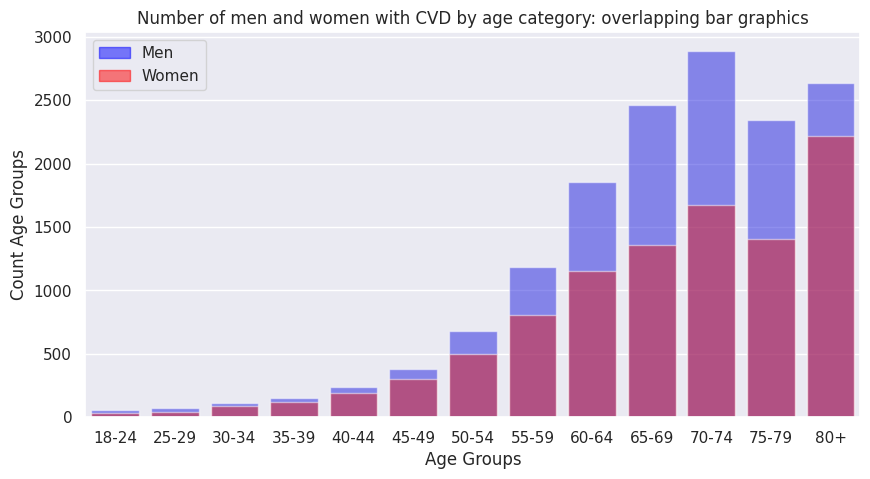

In [308]:
#CALCULO PARA MULHERES
womenAgeGroup, womenCountAge = graficoAgeCVD(mulherCVD)

#CALCULO PARA HOMENS
menAgeGroup, menCountAge = graficoAgeCVD(homemCVD)

#COLUNAS
ax=sns.barplot(x=menAgeGroup,y=menCountAge,color = 'blue', alpha = 0.5)
ax=sns.barplot(x=womenAgeGroup,y=womenCountAge,color = 'red', alpha = 0.5)

#RENOMEANDO DETALHES
plt.title("Number of men and women with CVD by age category: overlapping bar graphics")
ax.set(xlabel="Age Groups", ylabel="Count Age Groups")
bluepat = mpatches.Patch(color='blue',label= 'Men',alpha = 0.5)
redpat = mpatches.Patch(color='red',label= 'Women',alpha = 0.5)
plt.legend(handles=[bluepat,redpat],loc='upper left')

plt.show()


## Como diferentes comorbidades afetam o risco de contrair doenças cardiovasculares?

#### Utilizando um histograma:

In [309]:
def graficoDiseaseCVD(tabela):
    '''Funcao que retorna um grafico de barras com a
    quantidade de pessoas em cada categoria de comorbidade a partir de uma tabela'''
    keys = ["Skin_Cancer","Other_Cancer","Depression","Diabetes","Arthritis"]
    values = {}
    for key in keys:
        values[key] = len(tabela.query(f'{key} == "Yes"'))
    fig = plt.figure(figsize=(7,5))
    a,b = (zip(*values.items()))
    return list(a), list(b)

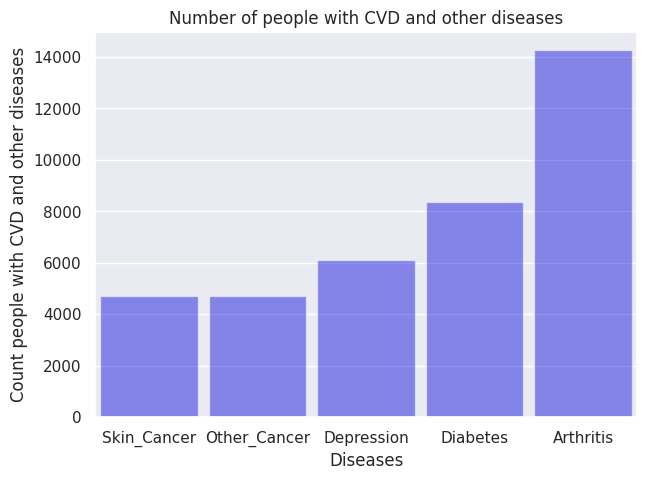

In [310]:
CVDDisease, countCVDDisease = graficoDiseaseCVD(df.query('Heart_Disease == "Yes"'))
ax=sns.barplot(x=CVDDisease,y=countCVDDisease,color = 'blue', alpha = 0.5, width=0.9)
plt.title("Number of people with CVD and other diseases")
ax.set(xlabel="Diseases", ylabel="Count people with CVD and other diseases")

plt.show()

## Quais são os fatores de risco mais relevantes para o desenvolvimento de doenças cardiovasculares?

##### Com base no gráfico anterior, a comorbidade mais relevante seria artrite. Para agora descobrir o hábito mais relevante, vamos montar um segundo gráfico:

In [311]:
def graficoConsumptionCVD(tabela):
    '''Funcao que retorna um grafico de barras com a
    quantidade de pessoas em cada categoria de consumo a partir de uma tabela'''
    averageAC = sum(tabela["Alcohol_Consumption"])/len(tabela["Alcohol_Consumption"])
    averageFC = sum(tabela["Fruit_Consumption"])/len(tabela["Fruit_Consumption"])
    averageGVC = sum(tabela["Green_Vegetables_Consumption"])/len(tabela["Green_Vegetables_Consumption"])
    averageFPC = sum(tabela["FriedPotato_Consumption"])/len(tabela["FriedPotato_Consumption"])
    keys = ["Smoking_History","Alcohol_Consumption","Fruit_Consumption","Green_Vegetables_Consumption", "FriedPotato_Consumption"]
    values = {}
    for key in keys:
        match(key):
            case "Smoking_History":
                values[key] = len(tabela.query(f'{key} == "Yes"'))
            case "Alcohol_Consumption":
                values[key] = len(tabela.query(f'{key} >= {averageAC}'))
            case "Fruit_Consumption":
                values[key] = len(tabela.query(f'{key} >= {averageFC}'))
            case "Green_Vegetables_Consumption":
                values[key] = len(tabela.query(f'{key} >= {averageGVC}'))
            case "FriedPotato_Consumption":
                values[key] = len(tabela.query(f'{key} >= {averageFPC}'))
    fig = plt.figure(figsize=(15,6))
    a,b = (zip(*values.items()))
    return list(a), list(b)

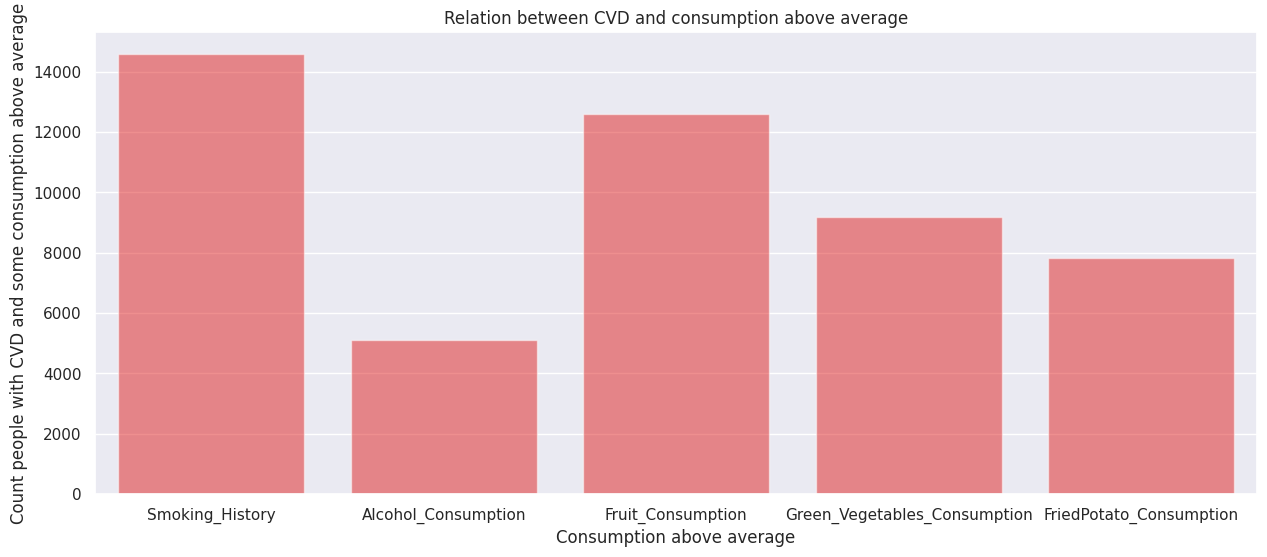

In [312]:
CVDConsumption, countCVDConsumption = graficoConsumptionCVD(df.query('Heart_Disease == "Yes"'))
ax=sns.barplot(x=CVDConsumption,y=countCVDConsumption,color = 'red', alpha = 0.5)
plt.title("Relation between CVD and consumption above average")
ax.set(xlabel="Consumption above average", ylabel="Count people with CVD and some consumption above average")

plt.show()

##### Podemos observar no gráfico acima que o hábito mais negativamente relevante é o histórico de fumo.

## Como a atividade física afeta o risco de doenças cardiovasculares?

In [313]:
totalCVD = len(df.query('Heart_Disease == "Yes"'))
exercicioS = len(df.query('Heart_Disease == "Yes" and Exercise == "Yes"'))
exercicioN = len(df.query('Heart_Disease == "Yes" and Exercise == "No"'))

print(f'CVD total: {totalCVD}')
print(f'CVD que malham: {exercicioS} ')
print(f'CVD que NÃO malham: {exercicioN} ')

pMalham =  exercicioS/totalCVD
pMalhamN =  exercicioN/totalCVD

print(f'Porcentagem CVD que malham: {pMalham * 100 :.1f}%')
print(f'Porcentagem CVD que NÃO malham: {pMalhamN*100:.1f}%')

CVD total: 24971
CVD que malham: 15967 
CVD que NÃO malham: 9004 
Porcentagem CVD que malham: 63.9%
Porcentagem CVD que NÃO malham: 36.1%


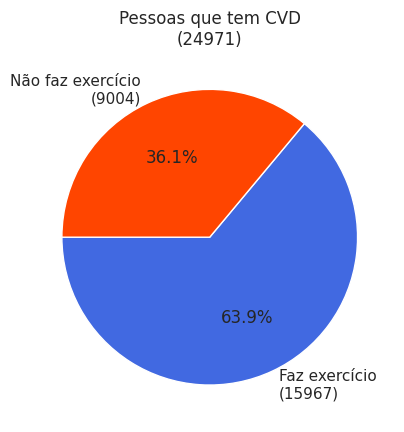

In [314]:
labelsCVD = [f'Faz exercício\n({exercicioS})', f'Não faz exercício\n({exercicioN})']
sizesCVD = [pMalham, pMalhamN]

fig, ax = plt.subplots()
ax.set_title(f'Pessoas que tem CVD\n({totalCVD})')
ax.pie(sizesCVD, labels=labelsCVD, autopct='%1.1f%%', colors = ["royalblue", "orangered"], startangle=180)
plt.show()

In [315]:
totalExercicio = len(df.query('Exercise == "Yes"'))
CVDsim = len(df.query('Heart_Disease == "Yes" and Exercise == "Yes"'))
CVDnao = len(df.query('Heart_Disease == "No" and Exercise == "Yes"'))

print(f'Total de pessoas que se exercitam: {totalExercicio}')
print(f'Exercicio e CVD: {CVDsim} ')
print(f'Exercicio sem CVD: {CVDnao}')

pCVDsim = CVDsim / totalExercicio *100
pCVDnao = CVDnao / totalExercicio *100

print(f'Porcentagem que malham e tem CVD: {pCVDsim :.1f}%')
print(f'Porcentagem que malham e NÃO tem CVD: {pCVDnao :.1f}%')

Total de pessoas que se exercitam: 239381
Exercicio e CVD: 15967 
Exercicio sem CVD: 223414
Porcentagem que malham e tem CVD: 6.7%
Porcentagem que malham e NÃO tem CVD: 93.3%


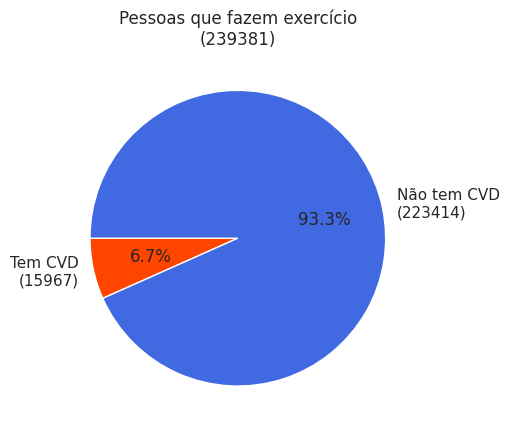

In [316]:
labelsExercicio = [f'Tem CVD\n({CVDsim})', f'Não tem CVD\n({CVDnao})']
sizesExercicio = [pCVDsim, pCVDnao]

fig, ax = plt.subplots()
ax.set_title(f'Pessoas que fazem exercício\n({totalExercicio})')
ax.pie(sizesExercicio, labels=labelsExercicio, autopct='%1.1f%%', colors = ["orangered", "royalblue"], startangle=180)
plt.show()

In [317]:
#Análise General Health
GHpoor = len(df.query('General_Health == "Poor"'))
GHfair = len(df.query('General_Health == "Fair"'))
GHgood = len(df.query('General_Health == "Good"'))
GHverygood = len(df.query('General_Health == "Very Good"'))
GHexcellent = len(df.query('General_Health == "Excellent"'))

#Estatística de exercícios General_Health == "Poor"
poorE = len(df.query('General_Health == "Poor" and Exercise == "Yes"'))
poorNE = len(df.query('General_Health == "Poor" and Exercise == "No"'))

ppoorE = poorE / GHpoor * 100
ppoorNE = poorNE / GHpoor * 100

print(f'Poor General Health que fazem exercício: {ppoorE :.1f}')
print(f'Poor General Health que NÃO fazem exercício: {ppoorNE:.1f}\n')

#Estatística de exercícios General_Health == "Fair"

fairE = len(df.query('General_Health == "Fair" and Exercise == "Yes"'))
fairNE = len(df.query('General_Health == "Fair" and Exercise == "No"'))

pfairE = fairE / GHfair * 100
pfairNE = fairNE / GHfair * 100

print(f'Fair General Health que fazem exercício: {pfairE :.1f}')
print(f'Fair General Health que NÃO fazem exercício: {pfairNE :.1f}\n')

#Estatística de exercícios General_Health == "Good"
goodE = len(df.query('General_Health == "Good" and Exercise == "Yes"'))
goodNE = len(df.query('General_Health == "Good" and Exercise == "No"'))

pgoodE = goodE / GHgood * 100
pgoodNE = goodNE / GHgood * 100

print(f'Good General Health que fazem exercício: {pgoodE :.1f}')
print(f'Good General Health que NÃO fazem exercício: {pgoodNE :.1f}\n')

#Estatística de exercícios General_Health == "Very Good"
verygoodE = len(df.query('General_Health == "Very Good" and Exercise == "Yes"'))
verygoodNE = len(df.query('General_Health == "Very Good" and Exercise == "No"'))

pverygoodE = verygoodE / GHverygood * 100
pverygoodNE = verygoodNE / GHverygood * 100

print(f'Very Good General Health que fazem exercício: {pverygoodE :.1f}')
print(f'Very Good General Health que NÃO fazem exercício: {pverygoodNE :.1f}\n')

#Estatística de exercícios General_Health == "Excellent"
excellentE = len(df.query('General_Health == "Excellent" and Exercise == "Yes"'))
excellentNE = len(df.query('General_Health == "Excellent" and Exercise == "No"'))

pexcellentE = excellentE / GHexcellent * 100
pexcellentNE = excellentNE / GHexcellent * 100

print(f'Excellent General Health que fazem exercício: {pexcellentE*100 :.1f}')
print(f'Excellent General Health que NÃO fazem exercício: {pexcellentNE*100 :.1f}\n')

Poor General Health que fazem exercício: 39.4
Poor General Health que NÃO fazem exercício: 60.6

Fair General Health que fazem exercício: 57.8
Fair General Health que NÃO fazem exercício: 42.2

Good General Health que fazem exercício: 74.0
Good General Health que NÃO fazem exercício: 26.0

Very Good General Health que fazem exercício: 85.2
Very Good General Health que NÃO fazem exercício: 14.8

Excellent General Health que fazem exercício: 8873.7
Excellent General Health que NÃO fazem exercício: 1126.3



In [318]:
#Análise General Health VS. CVD
#Estatística de exercícios General_Health == "Poor"
poorCVDE = len(df.query('General_Health == "Poor" and Exercise == "Yes" and Heart_Disease == "Yes"'))
ppoorCVDE = poorCVDE/GHpoor*100

#Estatística de exercícios General_Health == "Fair"

fairCVDE = len(df.query('General_Health == "Fair" and Exercise == "Yes"and Heart_Disease == "Yes"'))
pfairCVDE = fairCVDE/GHfair*100

#Estatística de exercícios General_Health == "Good"
goodCVDE = len(df.query('General_Health == "Good" and Exercise == "Yes"and Heart_Disease == "Yes"'))
pgoodCVDE = goodCVDE/GHgood*100


#Estatística de exercícios General_Health == "Very Good"
verygoodCVDE = len(df.query('General_Health == "Very Good" and Exercise == "Yes"and Heart_Disease == "Yes"'))
pverygoodCVDE = verygoodCVDE/GHverygood*100


#Estatística de exercícios General_Health == "Excellent"
excellentCVDE = len(df.query('General_Health == "Excellent" and Exercise == "Yes"and Heart_Disease == "Yes"'))
pexcellentCVDE = excellentCVDE/GHexcellent*100

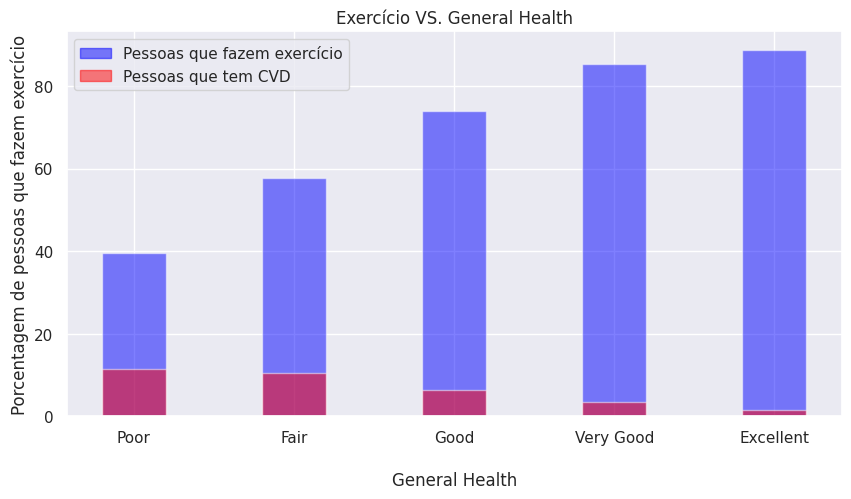

In [319]:
dataGHE = {'Poor':ppoorE, 'Fair':pfairE, 'Good':pgoodE, 'Very Good':pverygoodE, 'Excellent':pexcellentE}
dataGHECVD = {'Poor':ppoorCVDE, 'Fair':pfairCVDE, 'Good':pgoodCVDE, 'Very Good':pverygoodCVDE, 'Excellent':pexcellentCVDE}

GH = list(dataGHE.keys())
valuesGH = list(dataGHE.values())

GHCVD = list(dataGHECVD.keys())
valuesGHCVD = list(dataGHECVD.values())

fig = plt.figure(figsize = (10, 5))

## AJUSTAR AS LABELS!!
bluepat = mpatches.Patch(color='blue',label= 'Pessoas que fazem exercício',alpha = 0.5)
redpat = mpatches.Patch(color='red',label= 'Pessoas que tem CVD',alpha = 0.5)
plt.legend(handles=[bluepat,redpat],loc='upper left')

plt.bar(GH, valuesGH, color ='blue', width = 0.4, alpha = 0.5)
plt.bar(GHCVD, valuesGHCVD, color ='red', width = 0.4, alpha = 0.5)
plt.xlabel("\nGeneral Health")
plt.ylabel("Porcentagem de pessoas que fazem exercício")
plt.title("Exercício VS. General Health")
plt.show()

In [320]:
#Análise pessoas sem CVD

NCVDtotal = len(df.query('Heart_Disease == "No"'))
NCVDexercicioS = len(df.query('Heart_Disease == "No" and Exercise == "Yes"'))
NCVDexercicioN = len(df.query('Heart_Disease == "No" and Exercise == "No"'))

pNCVDexercicioS = NCVDexercicioS/NCVDtotal*100
pNCVDexercicioN = NCVDexercicioN/NCVDtotal*100

print(f'Porcentagem de saudáveis que fazem exercício: {pNCVDexercicioS:.1f}%')
print(f'Porcentagem de saudáveis que NÃo fazem exercício: {pNCVDexercicioN:.1f}%')

Porcentagem de saudáveis que fazem exercício: 78.7%
Porcentagem de saudáveis que NÃo fazem exercício: 21.3%


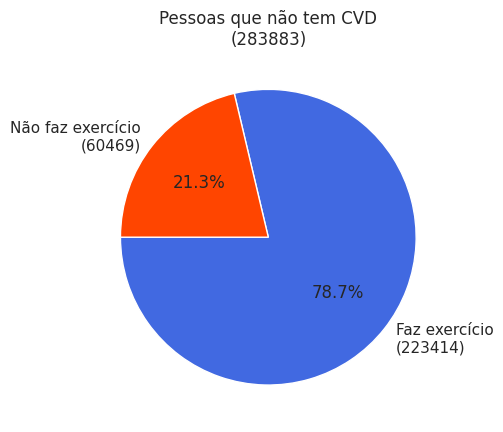

In [321]:
labelsNCVD= [f'Faz exercício\n({NCVDexercicioS})', f'Não faz exercício\n({NCVDexercicioN})']
sizesNCVD = [pNCVDexercicioS, pNCVDexercicioN]

fig, ax = plt.subplots()
ax.set_title(f'Pessoas que não tem CVD\n({NCVDtotal})')
ax.pie(sizesNCVD, labels=labelsNCVD, autopct='%1.1f%%', colors = ["royalblue", "orangered"], startangle=180)
plt.show()

In [322]:
#Análise pessoas que não malham

NEtotal = len(df.query('Exercise == "No"'))
NEcvdS = len(df.query('Exercise == "No" and Heart_Disease == "Yes"'))
NEcvdN= len(df.query('Exercise == "No" and Heart_Disease == "No"'))

pNEcvdS = NEcvdS / NEtotal  * 100
pNEcvdN = NEcvdN / NEtotal * 100

print(f'Porcentagem não fazem exercício e tem CVD: {pNEcvdS:.1f}%')
print(f'Porcentagem não fazem exercício e NÃO tem CVD: {pNEcvdN:.1f}%')

Porcentagem não fazem exercício e tem CVD: 13.0%
Porcentagem não fazem exercício e NÃO tem CVD: 87.0%


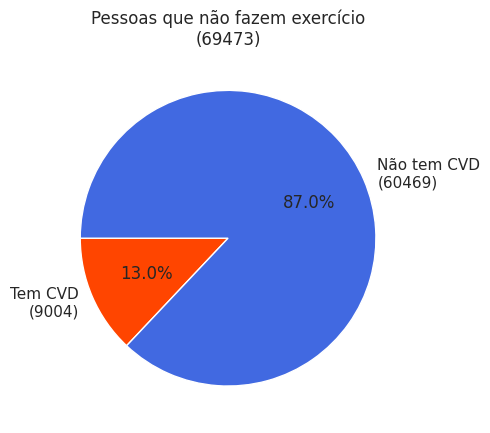

In [323]:
labelsNE= [f'Tem CVD\n({NEcvdS})', f'Não tem CVD\n({NEcvdN})']
sizesNE = [pNEcvdS, pNEcvdN]

fig, ax = plt.subplots()
ax.set_title(f'Pessoas que não fazem exercício\n({NEtotal})')
ax.pie(sizesNE, labels=labelsNE, autopct='%1.1f%%', colors = ["orangered", "royalblue"], startangle=180)
plt.show()